In [ ]:
"""
این تصویر را دریافت کنید و فیلتر الپالسی و گوسی را یکبار در حوزه زمان و یکبار در حوزه فرکانس اعمال کنید. از سیگماهای
مختلف استفاده کنید و نتایج را مقایسه کنید.
"""

In [ ]:
"""
سیگما تو شدت مات شدن عکس تاثیر داره
هر چی سیگما بیشتر، مات شدگی بیشتر
تو حوزه فرکانس، سیگما به گستردگی فیلتر گوسی تأثیر میذاره. سیگماهای بزرگ‌تر باعث فیلتر شدن بیشتر فرکانس‌های بالا میشه.
"""

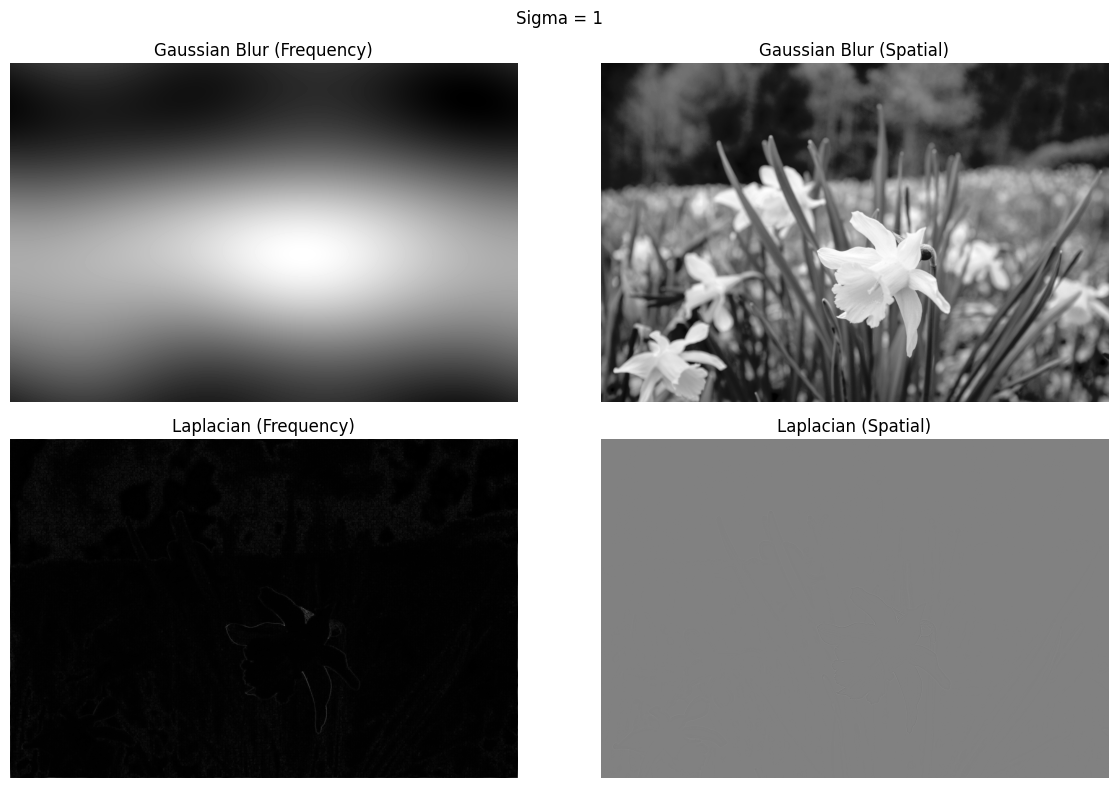

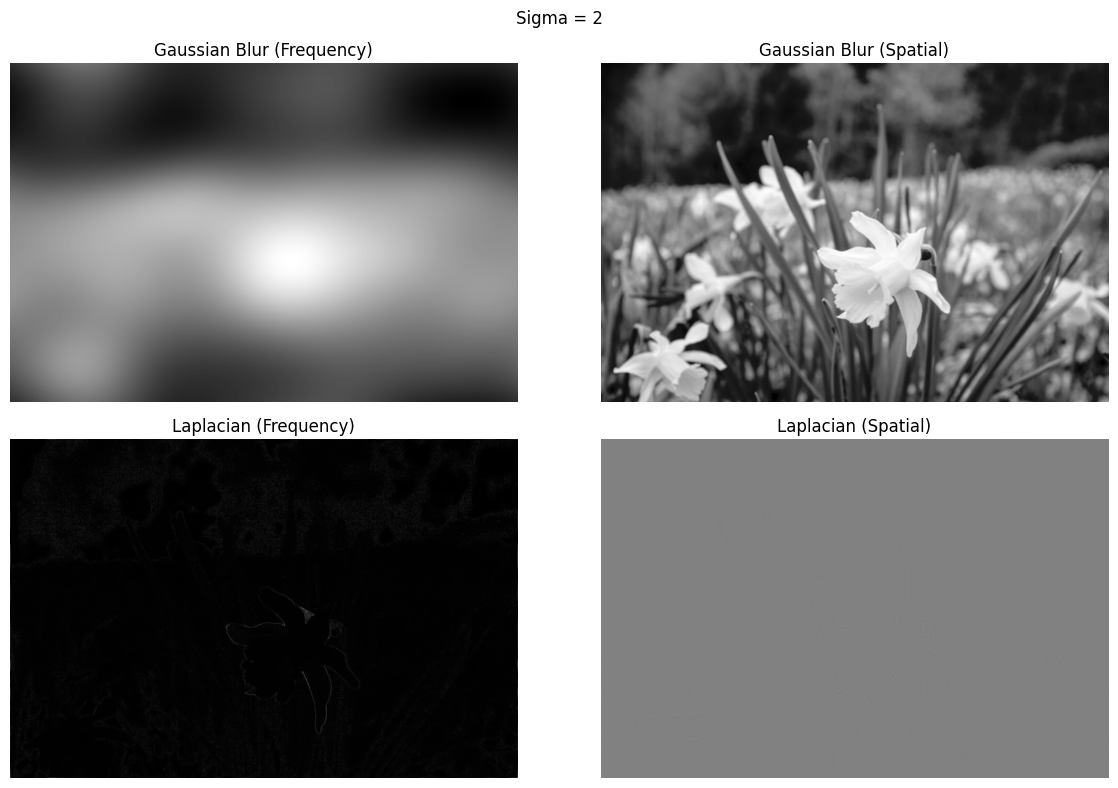

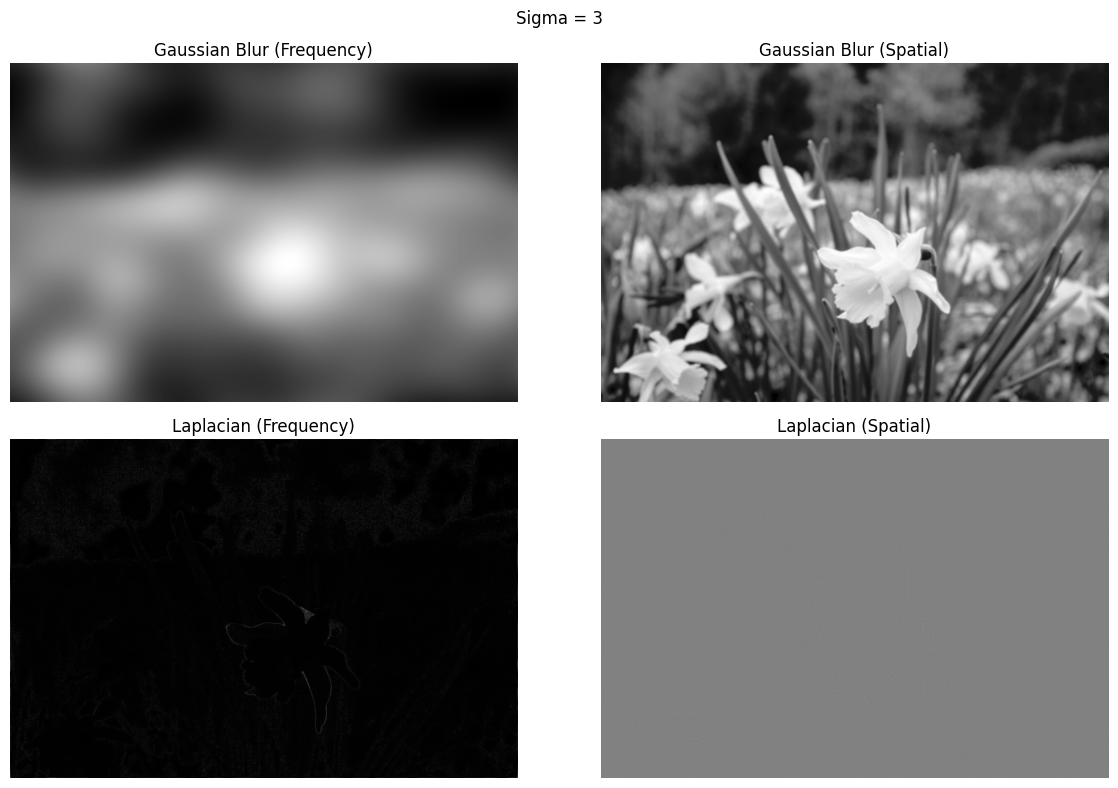

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpli

# Function to apply filters in spatial domain
def spatial(image, sigma):
    # Apply Gaussian filter
    gaussianBlur= cv2.GaussianBlur(image, (0, 0), sigma)

    # Apply Laplacian filter
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    return gaussianBlur, laplacian

# Function to apply filters in frequency domain
def frequency(image, sigma):
    # Compute the FFT of the image
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # Create Gaussian filter in frequency domain
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    gaussianFilter = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    
    # Apply Gaussian filter in frequency domain
    fshiftGauss = fshift * gaussianFilter
    f_ishiftGauss = np.fft.ifftshift(fshiftGauss)
    img_backGauss = np.fft.ifft2(f_ishiftGauss)
    img_backGauss = np.abs(img_backGauss)
    
    # Create Laplacian filter in frequency domain
    laplacianFilter = -(X**2 + Y**2)
    
    # Apply Laplacian filter in frequency domain
    fshiftLap = fshift * laplacianFilter
    f_ishiftLap = np.fft.ifftshift(fshiftLap)
    img_backLap = np.fft.ifft2(f_ishiftLap)
    img_backLap = np.abs(img_backLap)
    
    return img_backGauss, img_backLap

# Path to the image
path = 'D:\\sadeneh\\تمرین دوم\\سادنه صادقی- 9913012008\Q5\\5.jpg'  # Replace with your image path

# Read the image using matplotlib
image = mpli.imread(path)


# Convert the image to grayscale if it's in RGB format
if len(image.shape) == 3 and image.shape[2] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define sigma values to use for Gaussian filter
values = [1, 2, 3]

# Apply filters and plot results
for i in values:
    gaussBlurSpatial, lapSpatial = spatial(image, i)
    gaussBlurFrequency, lapFrequency = frequency(image, i)
    
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Sigma = {i}')

    plt.subplot(2, 2, 1)
    plt.imshow(gaussBlurFrequency, cmap='gray')
    plt.title('Gaussian Blur (Frequency)')
    plt.axis('off')


    plt.subplot(2, 2, 2)
    plt.imshow(gaussBlurSpatial, cmap='gray')
    plt.title('Gaussian Blur (Spatial)')
    plt.axis('off')



    plt.subplot(2, 2, 3)
    plt.imshow(lapFrequency, cmap='gray')
    plt.title('Laplacian (Frequency)')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(lapSpatial, cmap='gray')
    plt.title('Laplacian (Spatial)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
